In [1]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
data.shape

(40000, 14)

In [7]:
data.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


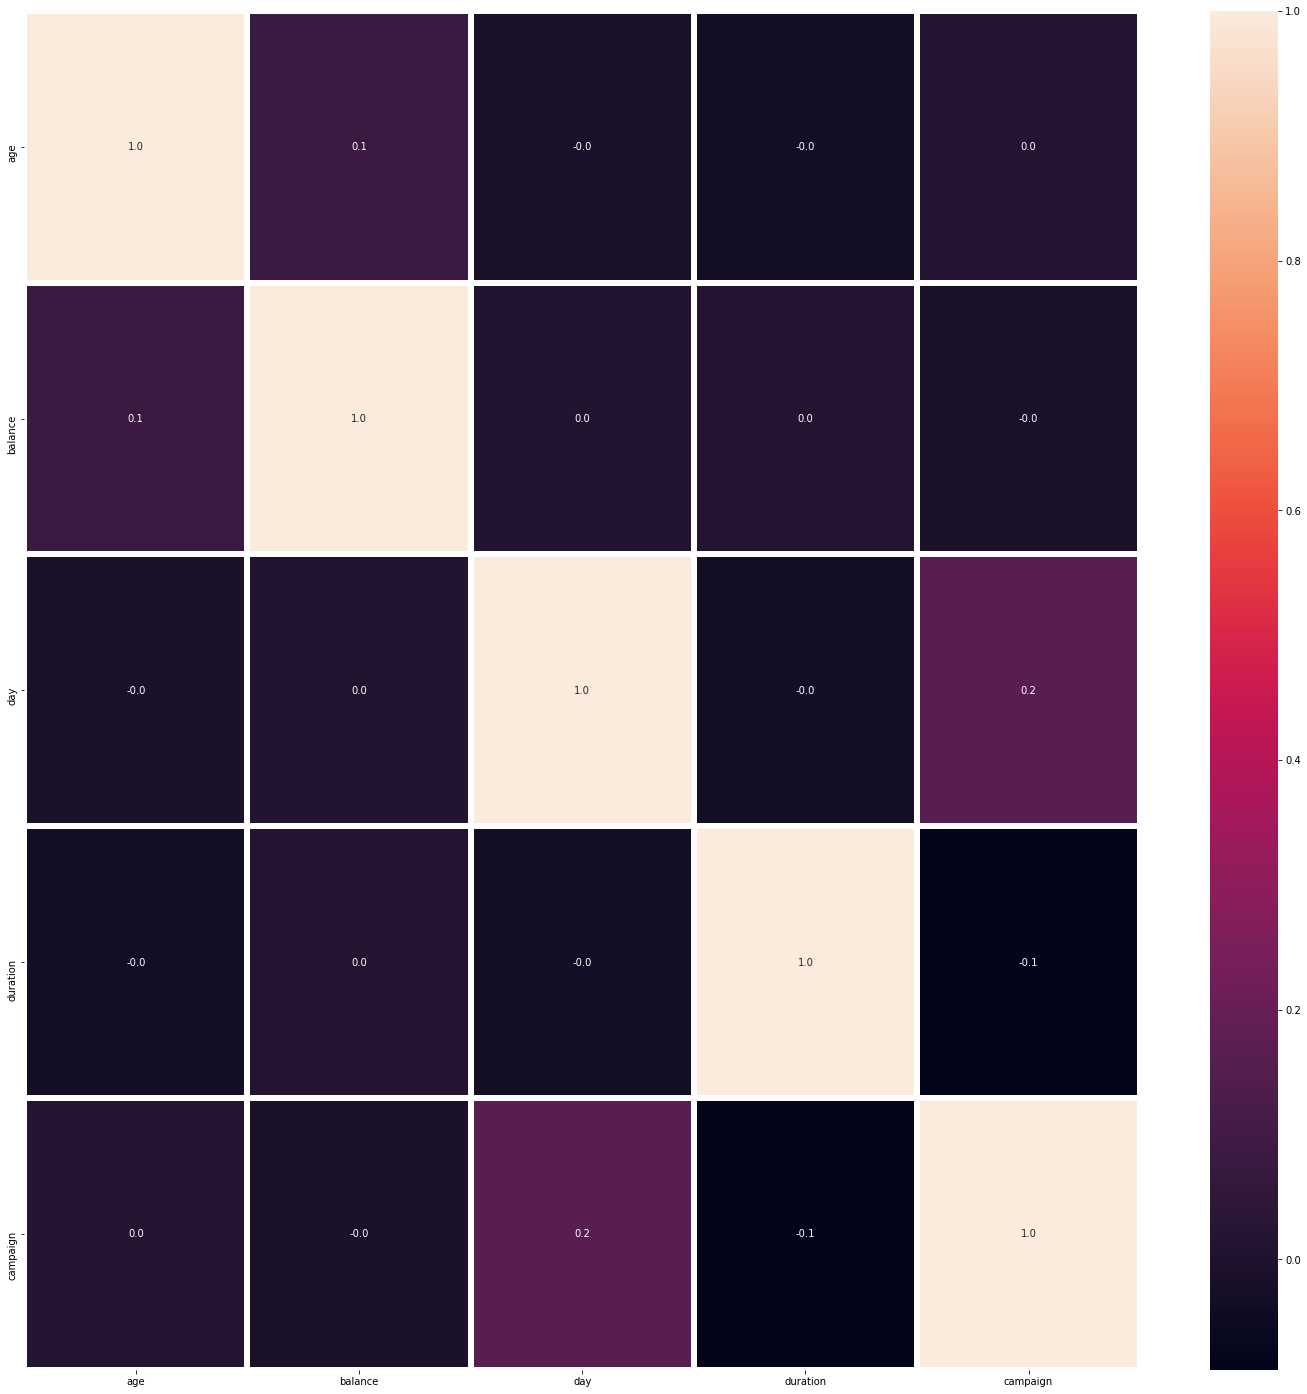

In [8]:
b,ax = plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, linewidths=5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [10]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

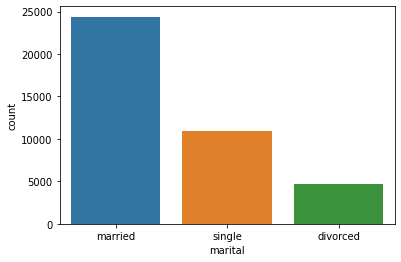

In [11]:
sns.countplot(x="marital", data=data)
data.loc[:,'marital'].value_counts()

1     14718
2     11153
3      4970
4      3297
5      1642
6      1228
7       699
8       526
9       318
10      262
11      197
12      154
13      131
14       93
15       83
16       78
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

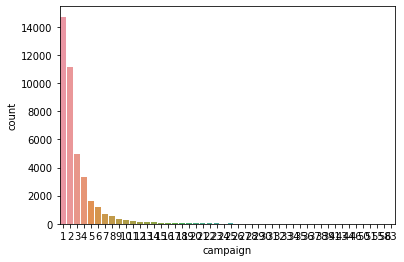

In [12]:
sns.countplot(x="campaign", data=data)
data.loc[:,'campaign'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

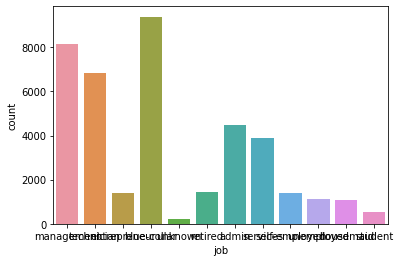

In [13]:
sns.countplot(x="job", data=data)
data.loc[:,'job'].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

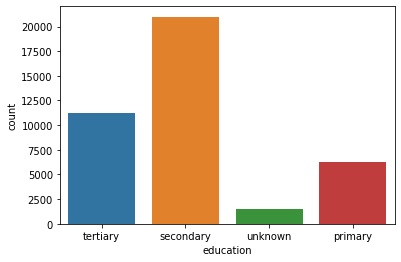

In [14]:
sns.countplot(x="education", data=data)
data.loc[:,'education'].value_counts()

yes    24031
no     15969
Name: housing, dtype: int64

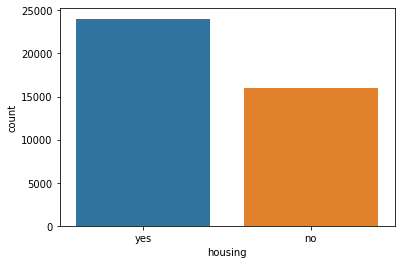

In [15]:
sns.countplot(x="housing", data=data)
data.loc[:,'housing'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

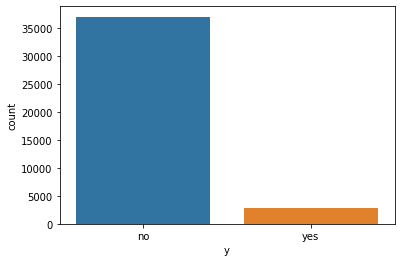

In [16]:
sns.countplot(x="y", data=data)
data.loc[:,'y'].value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

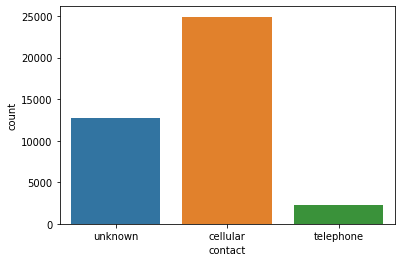

In [17]:
sns.countplot(x="contact", data=data)
data.loc[:,'contact'].value_counts()

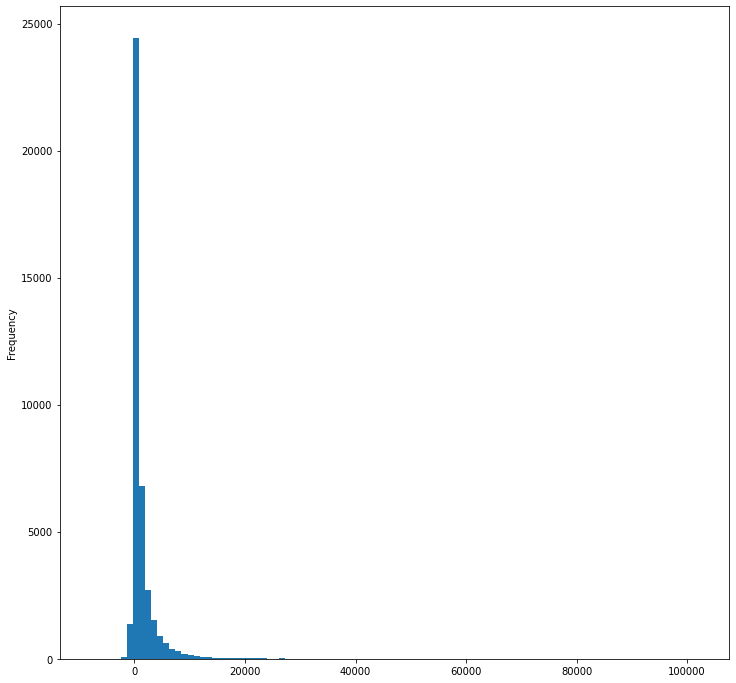

In [18]:
# Histogram
# bins = number of bar in figure
data.balance.plot(kind = 'hist',bins = 100,figsize = (12,12))
plt.show()

<AxesSubplot:title={'center':'balance'}, xlabel='housing'>

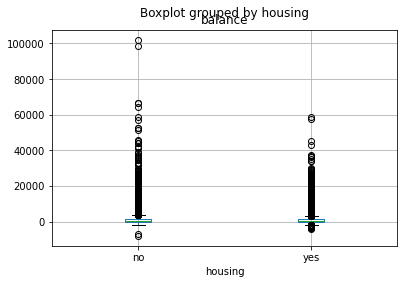

In [19]:
data.boxplot(column='balance',by = 'housing')

<AxesSubplot:title={'center':'balance'}, xlabel='age'>

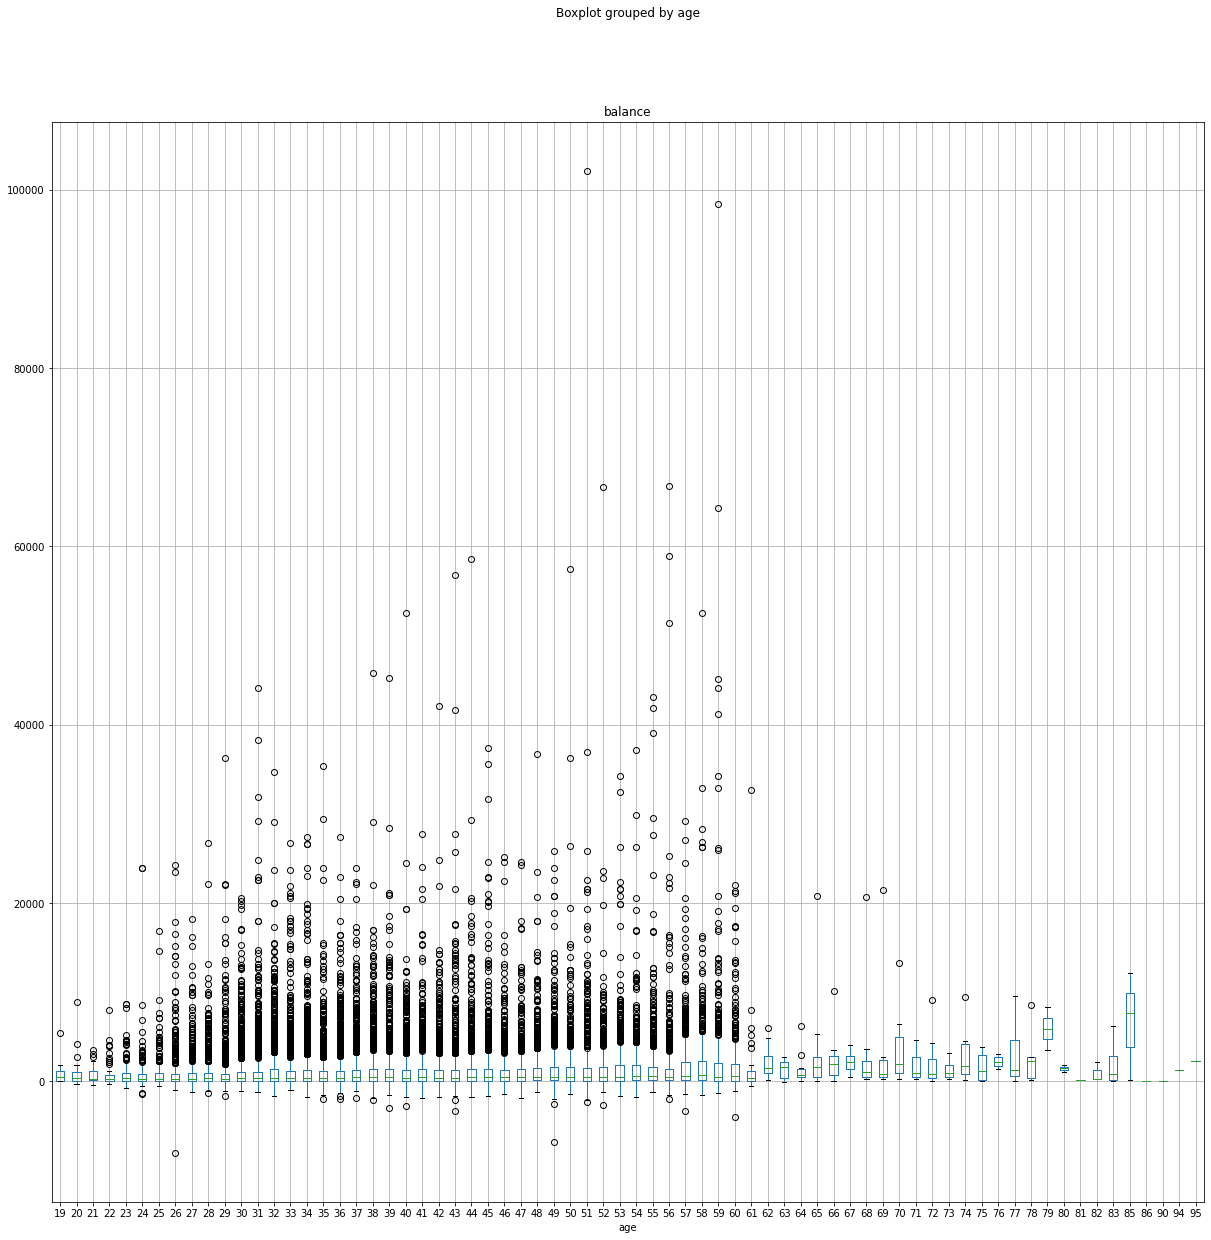

In [20]:
data.boxplot(column='balance',by = 'age',figsize=(20,20))

In [21]:
data["balance"].value_counts(dropna =False)

0       3209
1        179
2        141
4        126
3        124
        ... 
4720       1
4313       1
2675       1
4752       1
4667       1
Name: balance, Length: 6849, dtype: int64

C:\Users\oktay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


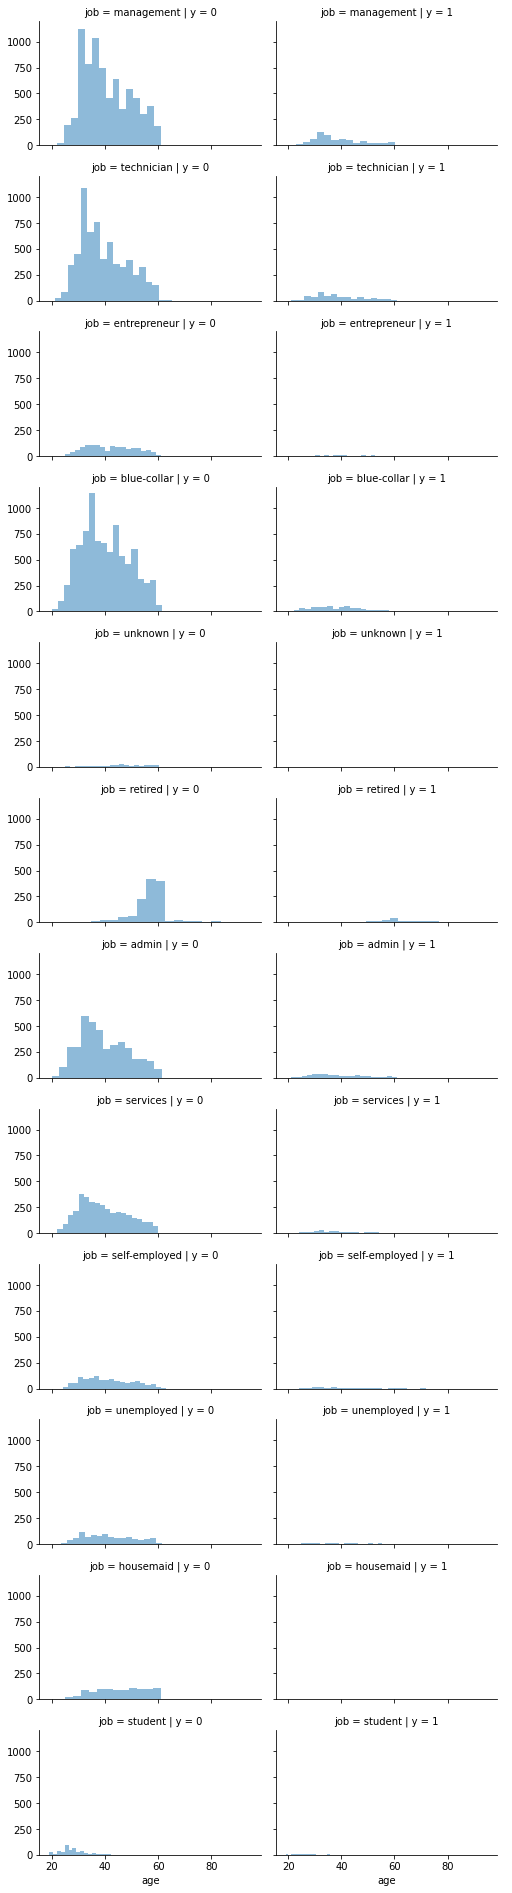

In [39]:
grid = sns.FacetGrid(data, col='y', row='job', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\oktay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


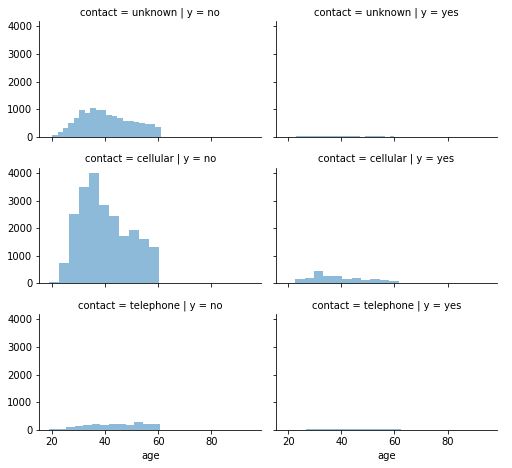

In [23]:
grid = sns.FacetGrid(data, col='y', row='contact', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\oktay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


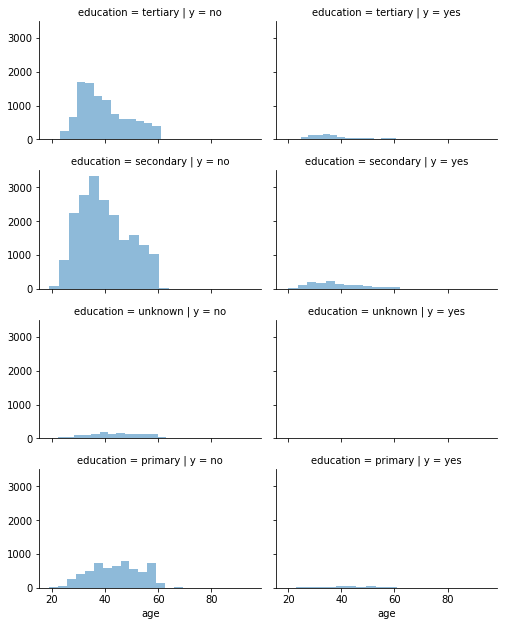

In [24]:
grid = sns.FacetGrid(data, col='y', row='education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
data['y'] = data['y'].map( {'yes': 1, 'no': 0} ).astype(int)
data['housing'] = data['housing'].map( {'yes': 1, 'no': 0} ).astype(int)
data['loan'] = data['loan'].map( {'yes': 1, 'no': 0} ).astype(int)
data['marital'] = data['marital'].map( {'single' : 2, 'married': 1, 'divorced': 0} )

In [26]:
data.dtypes

age           int64
job          object
marital       int64
education    object
default      object
balance       int64
housing       int32
loan          int32
contact      object
day           int64
month        object
duration      int64
campaign      int64
y             int32
dtype: object

In [27]:
features = ['age', 'balance', 'housing', 'loan', 'duration', 'marital']
X = data[features]
y = data['y']

In [28]:
X

,age,balance,housing,loan,duration,marital
0,58,2143,1,0,261,1
1,44,29,1,0,151,2
2,33,2,1,1,76,1
3,47,1506,1,0,92,1
4,33,1,0,0,198,2
...,...,...,...,...,...,...
39995,53,395,0,0,107,1
39996,30,3340,0,0,238,2
39997,54,200,0,0,170,0
39998,34,1047,0,0,342,1


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [30]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.08224142 0.0958835  0.090744   0.1252025  0.1346625 ]


In [31]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.10574678333333334


In [32]:
# %% train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(X_train,y_train)
print("Random Forest algorithm accuracy: ",rf.score(X,y))

Random Forest algorithm accuracy:  0.978025


In [34]:
#CONFUSİON MATRİX FOR RANDOM FOREST
y_pred = rf.predict(X_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


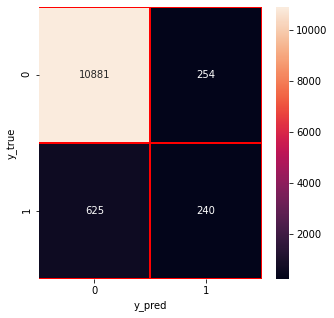

In [35]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()